In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("SampleSuperstore.csv", delimiter=';')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
print(df.shape)
df.describe()

(9994, 13)


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


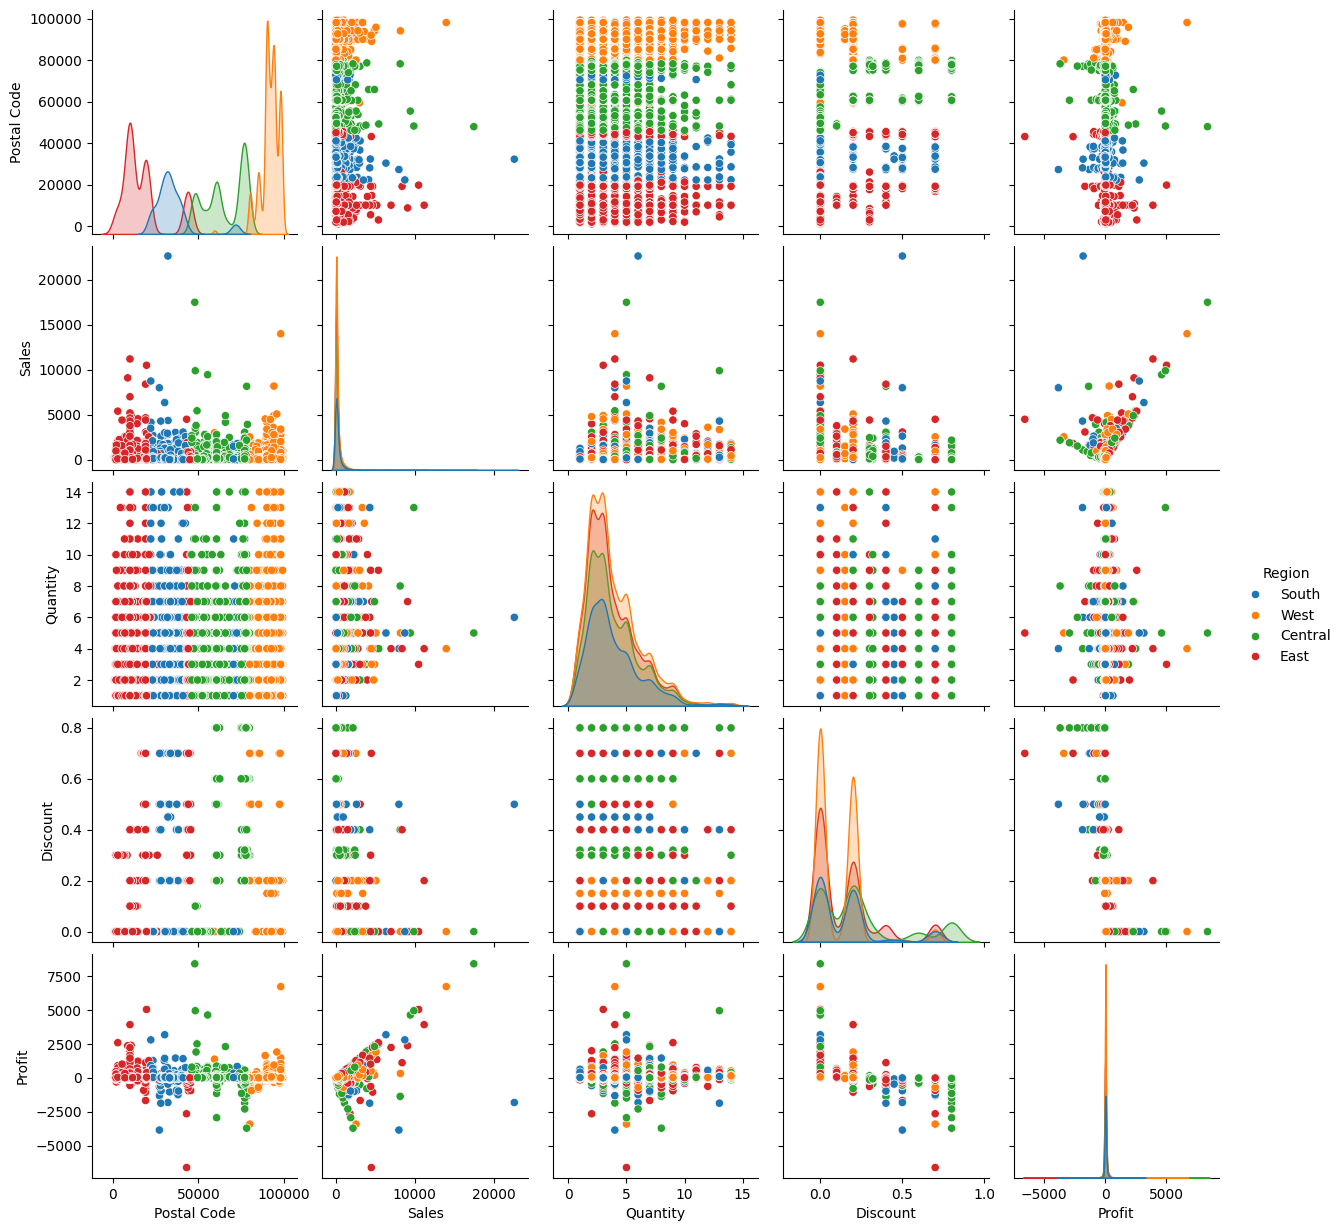

In [14]:
sns.pairplot(df,hue='Region')


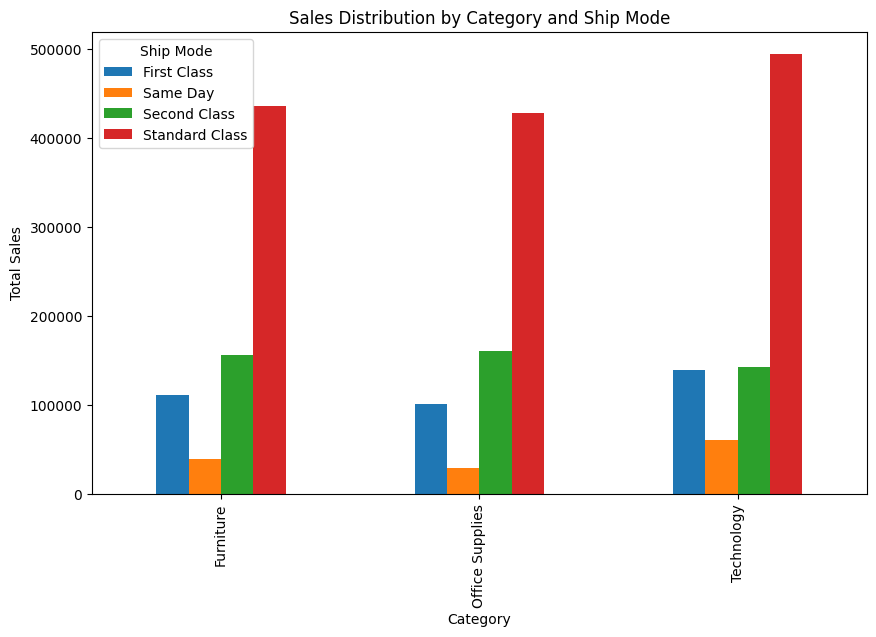

In [28]:

# Group the data by 'Category' and 'Ship Mode' and calculate total sales
sales_by_category_shipmode = df.groupby(['Category', 'Ship Mode'])['Sales'].sum().unstack()

# Create the grouped bar chart
sales_by_category_shipmode.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Total Sales')
title= plt.title('Sales Distribution by Category and Ship Mode')

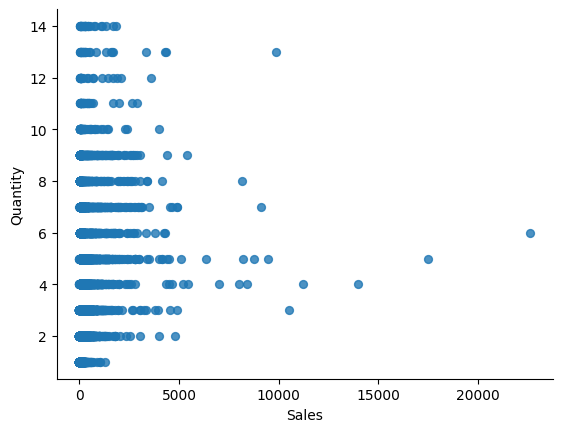

In [26]:
df.plot(kind='scatter', x='Sales', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Distribution of Deals by State')

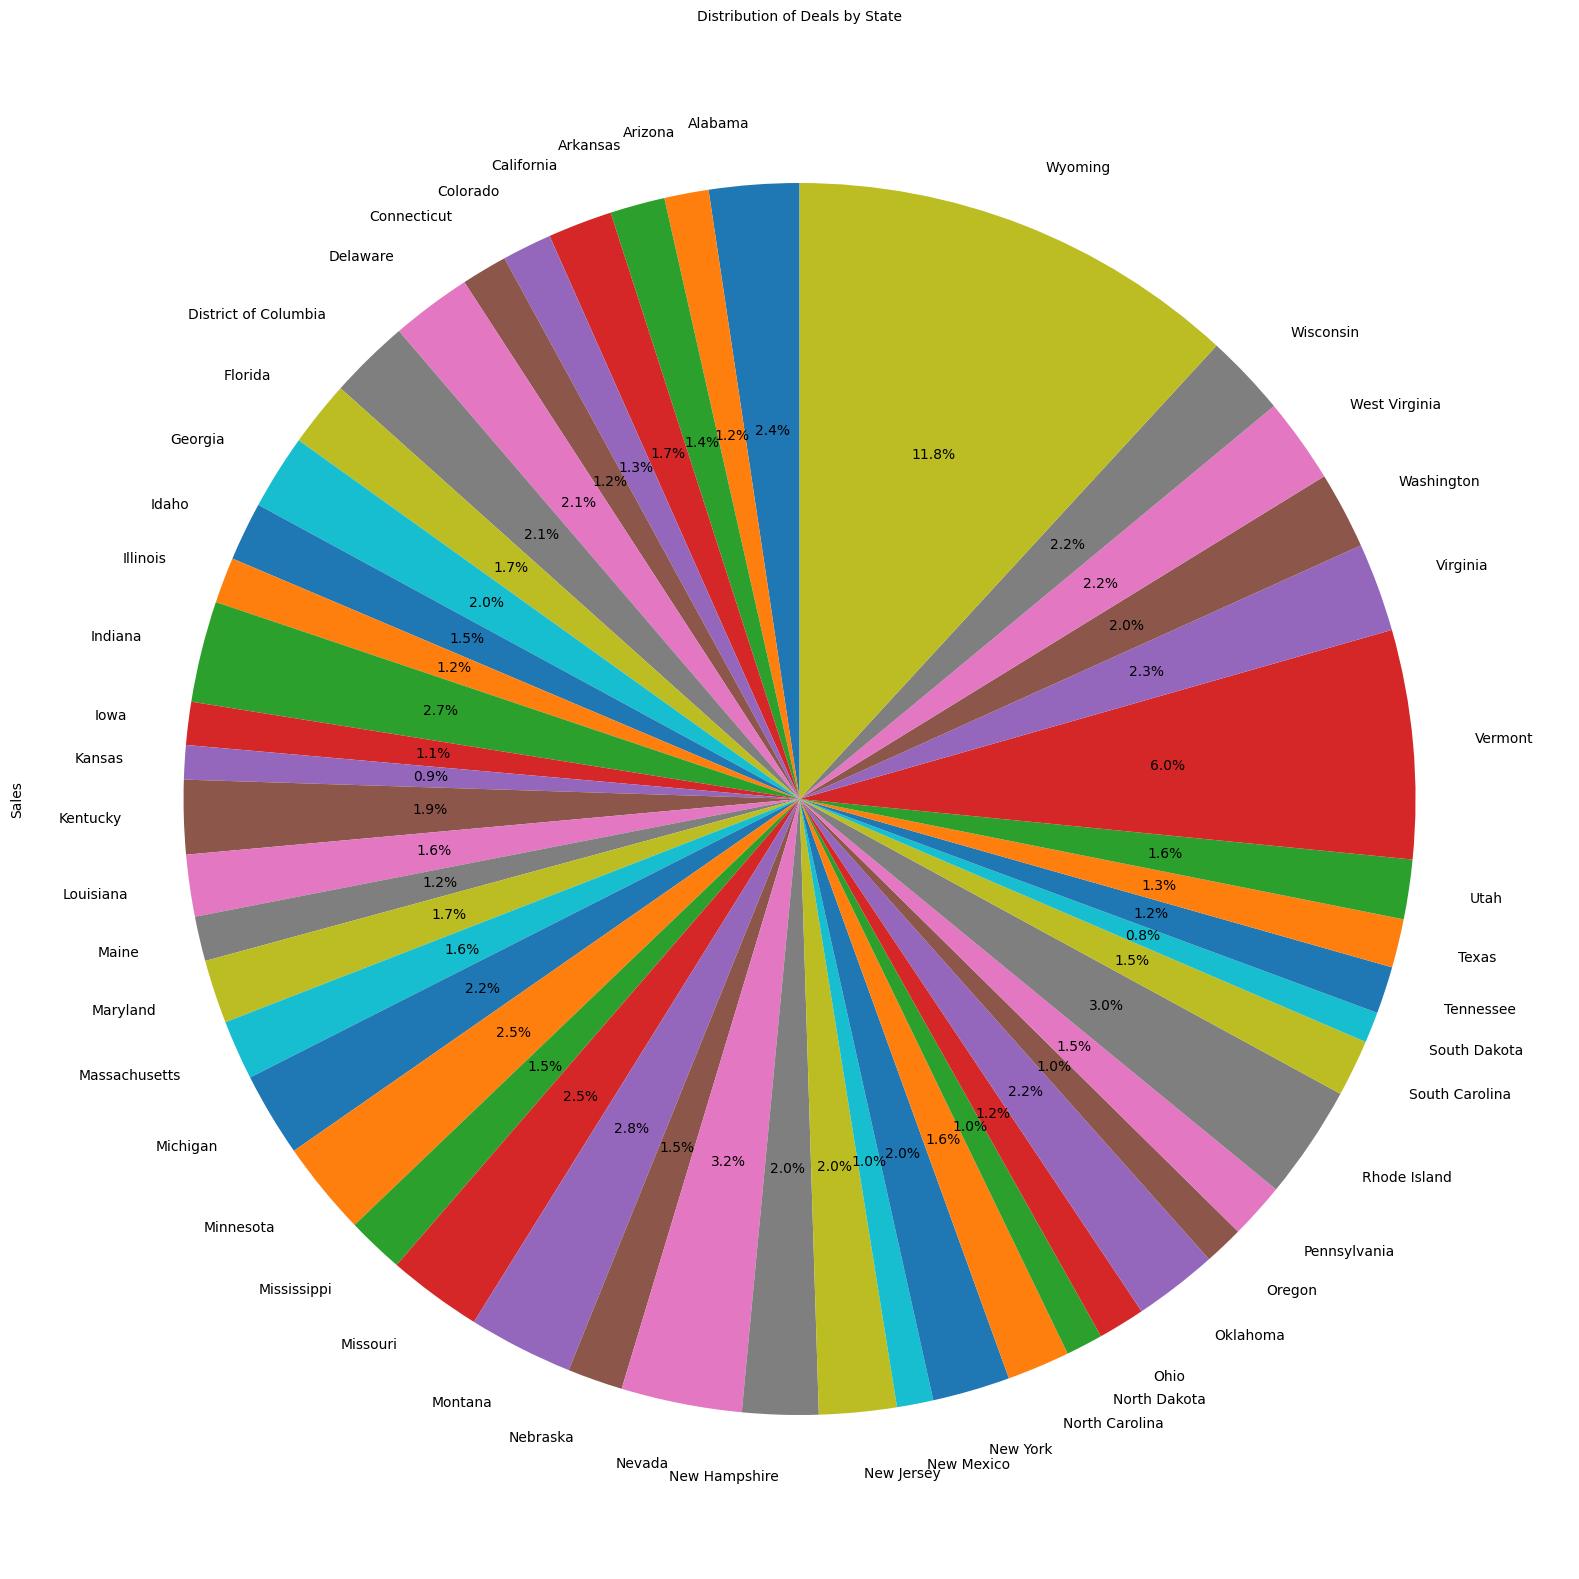

In [30]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state['Sales'].plot(kind='pie',figsize = (20,20),autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Deals by State',fontsize=10)

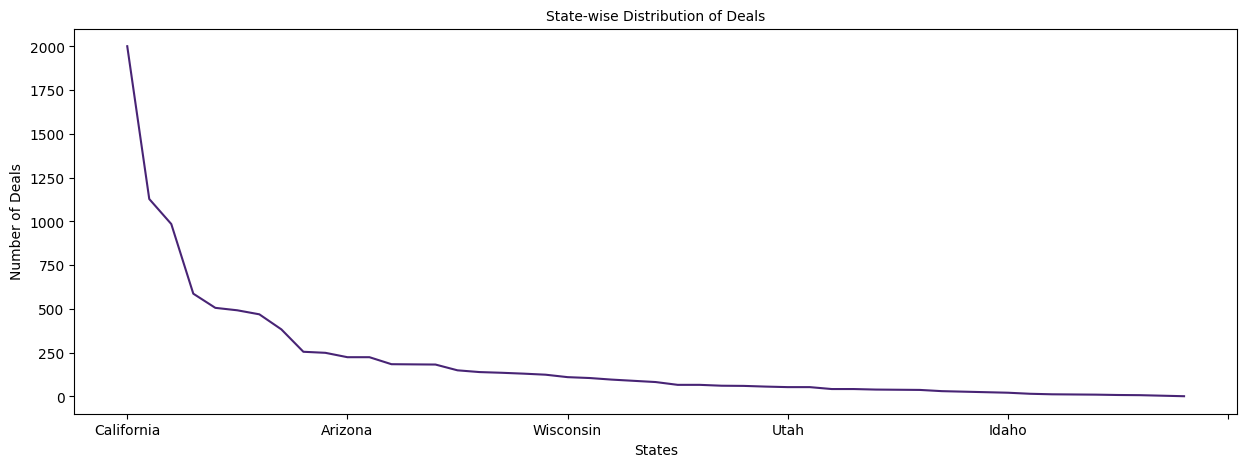

In [24]:
df_state_counts = df['State'].value_counts()

# Define a colormap with a gradient effect
colors = plt.cm.viridis(np.linspace(0.1, 0.8, len(df_state_counts)))

# Plotting the bar chart with gradient colors
df_state_counts.plot( figsize=(15, 5), color=colors)

# Adding labels and title with changed names
plt.ylabel('Number of Deals')
plt.xlabel('States')
plt.title('State-wise Distribution of Deals', fontsize=10)

# Display the plot
plt.show()

#Conclusion
---
Sales vary significantly across categories and shipping modes, with

Technology leading in both sales and profit, while Furniture lags behind.

There's a notable correlation between sales and profit, and a weaker

correlation between quantity and profit. California, New York, and Texas

top the list for deal volume, with Vermont leading in profitability and

Ohio showing the lowest profit among states.